In [5]:
import data_loader
import torch
from torch_geometric.data import Data
import networkx as nx
import network

/home/sergey/miniconda3/envs/gnn/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
example_network = network.Network.from_data_file('network_data/1/sim/network.lmp')

Atoms expected: 119
Atoms read: 119
Bonds expected: 307
Bonds read: 307
No angle data have been found
Calculating angles..
Angles calculated: 1046
No dihedrals data have been found
Dihedrals are not yet emplemented.
Found mass info: 
    Atom type: 1, mass: 100000.0 units


In [7]:
data_0 = data_loader.parse_dump(
    'network_data/1/sim/dump.lammpstrj',
    example_network,
    'full'
)[0]
data_0

Data(x=[119, 4], edge_index=[2, 307], edge_attr=[307])

In [8]:
G = nx.Graph()
for index, node in enumerate(data_0.x):
    G.add_node(index, pos=(node[0], node[1]))
edges = data_0.edge_index.t().tolist()
G.add_edges_from(edges)

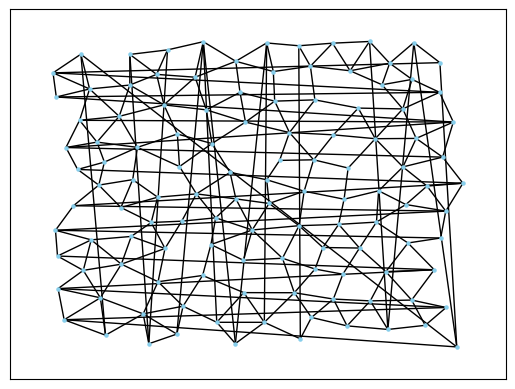

In [9]:
pos=nx.get_node_attributes(G,'pos')
nx.draw_networkx(G, pos, with_labels=False, node_color='skyblue', node_size=5, font_size=10)
